In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose

### Load the dataset (Replace 'sales_data.csv' with your actual file path)

In [7]:
import os
print(os.getcwd())  # This prints the current working directory


c:\Users\Lenovo\Documents\My Projects\Internship Project\Healthcare Pharmacy\Medicine_sales_prediction\notebooks


In [9]:
df = pd.read_csv(r"C:\Users\Lenovo\Documents\My Projects\Internship Project\Healthcare Pharmacy\Medicine_sales_prediction\data\salesmonthly.csv", parse_dates=['datum'], index_col='datum')


### Display basic info

In [10]:
print("Dataset Info:\n", df.info())
print("\nFirst 5 rows:\n", df.head())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 70 entries, 2014-01-31 to 2019-10-31
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   M01AB   70 non-null     float64
 1   M01AE   70 non-null     float64
 2   N02BA   70 non-null     float64
 3   N02BE   70 non-null     float64
 4   N05B    70 non-null     float64
 5   N05C    70 non-null     float64
 6   R03     70 non-null     float64
 7   R06     70 non-null     float64
dtypes: float64(8)
memory usage: 4.9 KB
Dataset Info:
 None

First 5 rows:
              M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06
datum                                                                    
2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2
2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2
2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4
2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   

In [11]:
# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())


Missing Values:
 M01AB    0
M01AE    0
N02BA    0
N02BE    0
N05B     0
N05C     0
R03      0
R06      0
dtype: int64


### Plot sales over time

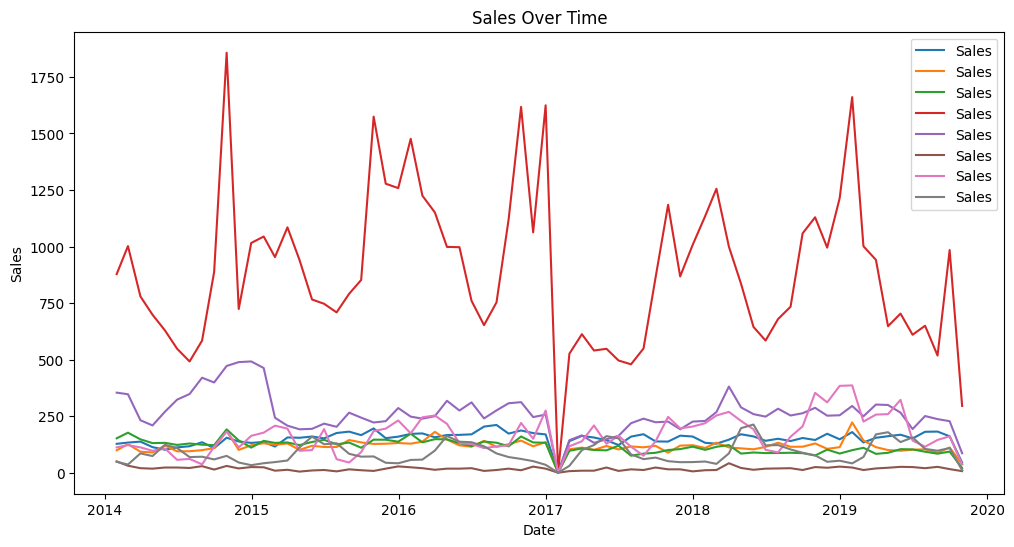

In [12]:
plt.figure(figsize=(12,6))
plt.plot(df, label='Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Over Time')
plt.legend()
plt.show()

### Perform seasonal decomposition

In [15]:
df.index = pd.to_datetime(df.index)

In [19]:
print(df.head())
print(df.columns)

             M01AB    M01AE    N02BA     N02BE   N05B  N05C    R03    R06
datum                                                                    
2014-01-31  127.69   99.090  152.100   878.030  354.0  50.0  112.0   48.2
2014-02-28  133.32  126.050  177.000  1001.900  347.0  31.0  122.0   36.2
2014-03-31  137.44   92.950  147.655   779.275  232.0  20.0  112.0   85.4
2014-04-30  113.10   89.475  130.900   698.500  209.0  18.0   97.0   73.7
2014-05-31  101.79  119.933  132.100   628.780  270.0  23.0  107.0  123.7
Index(['M01AB', 'M01AE', 'N02BA', 'N02BE', 'N05B', 'N05C', 'R03', 'R06'], dtype='object')


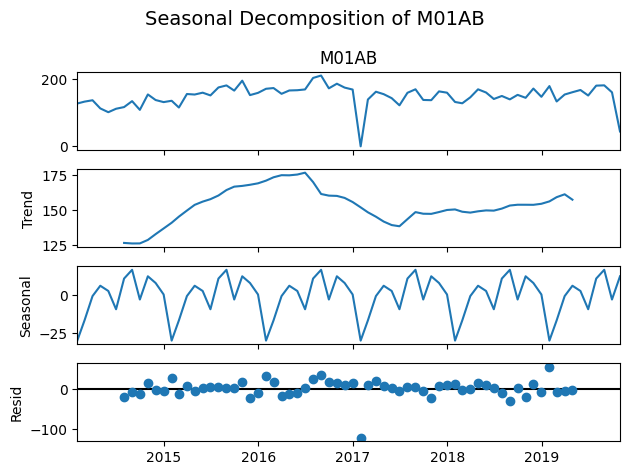

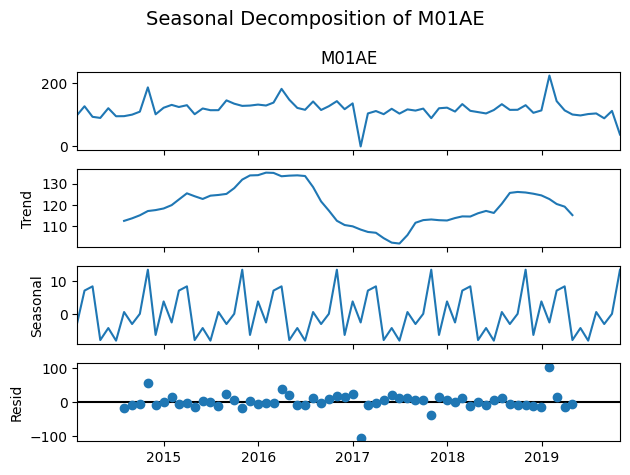

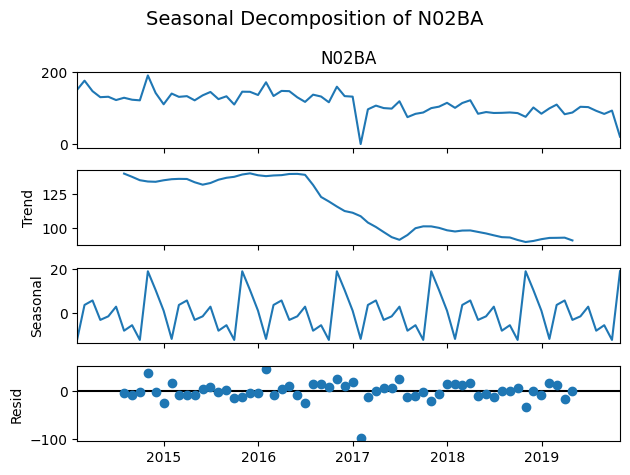

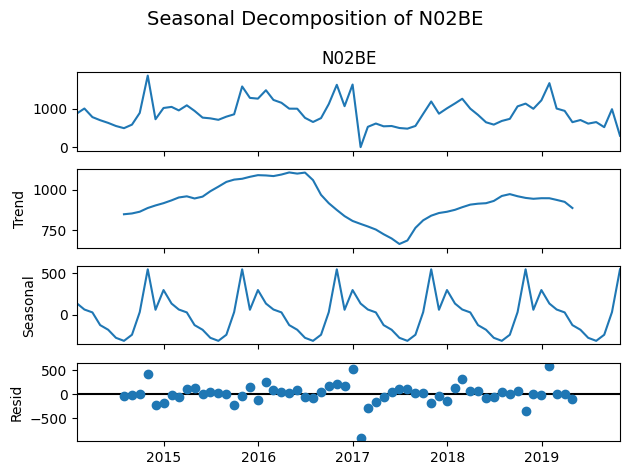

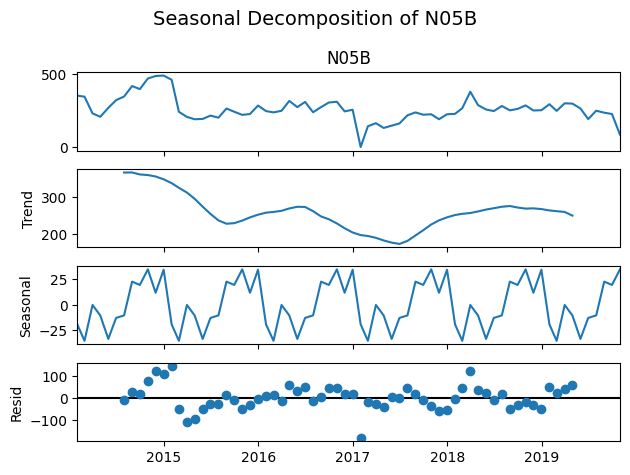

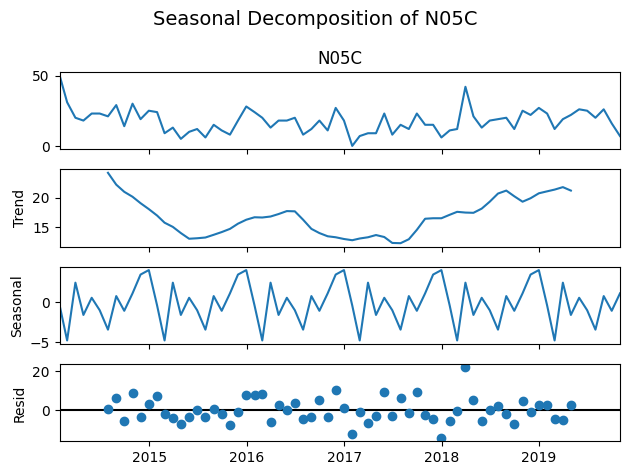

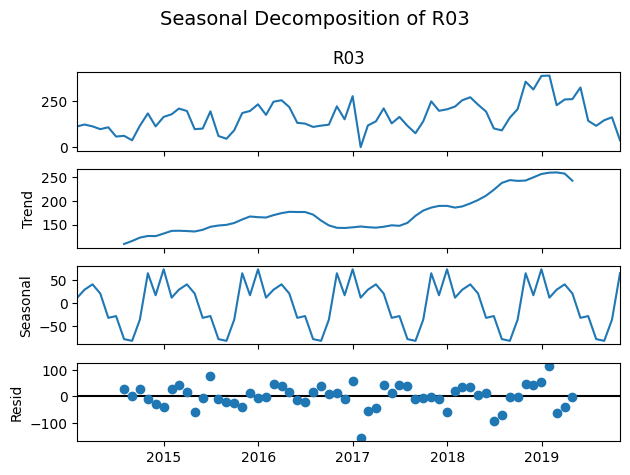

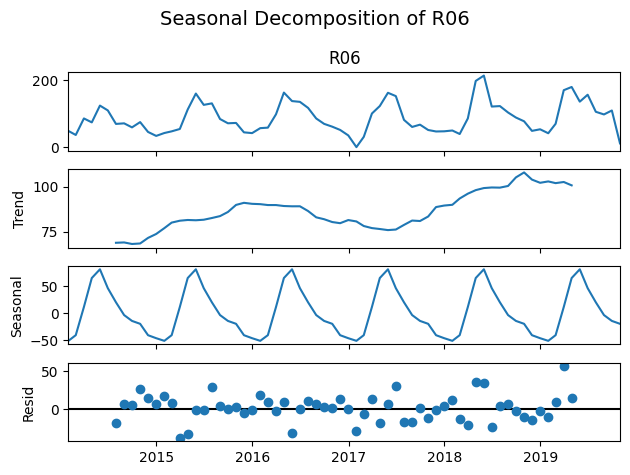

In [22]:
for col in df.columns:
    result = seasonal_decompose(df[col], model='additive', period=12)
    
    fig = result.plot()
    fig.suptitle(f'Seasonal Decomposition of {col}', fontsize=14)
    
    # Adjust title position to avoid overlap
    plt.subplots_adjust(top=0.85)
    
    plt.show()

### Check stationarity using ADF test

In [23]:
def adf_test(series):
    result = adfuller(series)
    print(f"ADF Statistic: {result[0]}")
    print(f"p-value: {result[1]}")
    print("Critical Values:")
    for key, value in result[4].items():
        print(f"   {key}: {value}")
    if result[1] <= 0.05:
        print("Data is stationary.")
    else:
        print("Data is NOT stationary.")

In [25]:
print("\nADF Test Results:")
adf_test(df['M01AB'])


ADF Test Results:
ADF Statistic: -5.367074694097212
p-value: 3.970457755741786e-06
Critical Values:
   1%: -3.528889992207215
   5%: -2.9044395987933362
   10%: -2.589655654274312
Data is stationary.


### Plot ACF and PACF

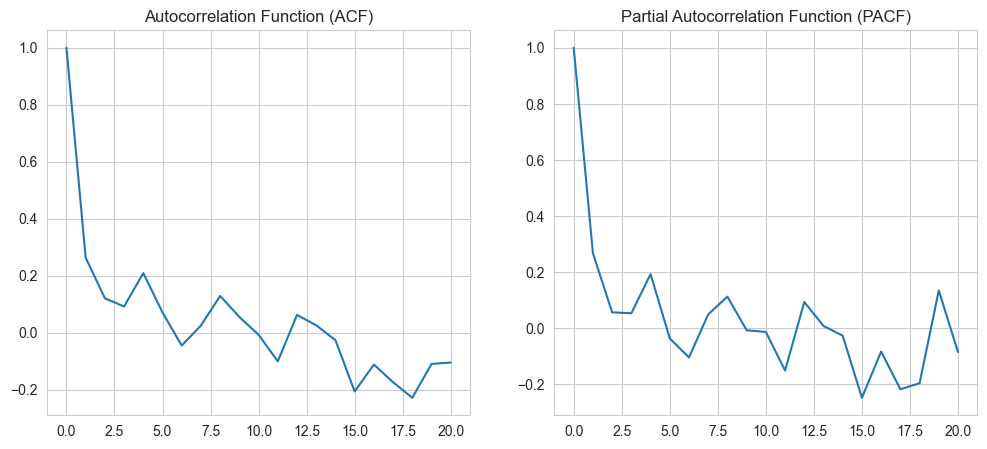

In [29]:
plt.figure(figsize=(12,5))
sns.set_style('whitegrid')

plt.subplot(121)
sns.lineplot(x=range(len(acf(df['M01AB'], nlags=20))), y=acf(df['M01AB'], nlags=20))
plt.title("Autocorrelation Function (ACF)")

plt.subplot(122)
sns.lineplot(x=range(len(pacf(df['M01AB'], nlags=20))), y=pacf(df['M01AB'], nlags=20))
plt.title("Partial Autocorrelation Function (PACF)")

plt.show()